In [59]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [60]:

ads = pd.read_csv('csv files/Social_Network_Ads.csv')

ads.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [61]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [62]:
ads.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [63]:
ads.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [64]:
ads.shape

(400, 3)

In [65]:
# Correlation
ads.corr()

#the above code would run on jupyter. use following code in case it does not work out.

# Select only numeric columns
numeric_columns = ads.select_dtypes(include=['int64', 'float64'])

# Calculate correlation
correlation = numeric_columns.corr()

print("Correlation:")
print(correlation)


Correlation:
                      Age  EstimatedSalary  Purchased
Age              1.000000         0.155238   0.622454
EstimatedSalary  0.155238         1.000000   0.362083
Purchased        0.622454         0.362083   1.000000


[]

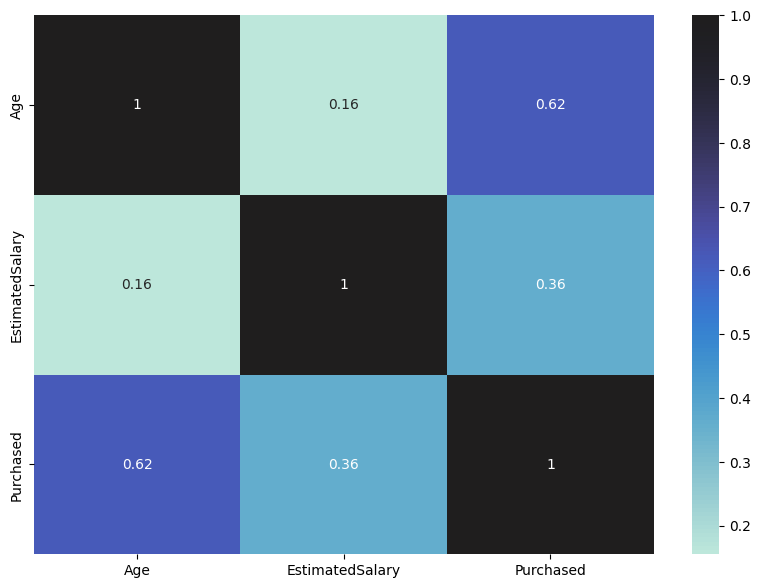

In [66]:
# Check correlation between dependent and independent variable
plt.figure(figsize=(10,7))  #10-width, 7-height
sns.heatmap(data=ads.corr(),annot=True,center=True,cbar=True)
plt.plot()

In [67]:
from sklearn import preprocessing

In [68]:
label_encoder = preprocessing.LabelEncoder()
ads1 = ads
ads1.head(10)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [69]:
np.where(ads1['Purchased'] == 1)

(array([  7,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         31,  48,  63,  75,  85,  97, 103, 137, 146, 159, 160, 168, 182,
        202, 204, 206, 208, 210, 211, 215, 219, 221, 222, 223, 226, 227,
        229, 230, 232, 233, 235, 239, 240, 242, 243, 245, 247, 249, 252,
        253, 255, 258, 259, 261, 262, 264, 265, 268, 271, 272, 273, 274,
        275, 277, 278, 279, 280, 282, 283, 285, 287, 289, 290, 291, 292,
        296, 297, 299, 300, 301, 302, 303, 307, 308, 311, 313, 315, 316,
        318, 320, 321, 323, 324, 328, 329, 331, 334, 336, 339, 340, 343,
        344, 346, 347, 350, 352, 354, 355, 356, 358, 360, 361, 362, 364,
        365, 366, 367, 369, 370, 371, 373, 375, 378, 379, 381, 382, 383,
        384, 385, 386, 388, 389, 390, 391, 392, 393, 395, 396, 397, 399],
       dtype=int64),)

[]

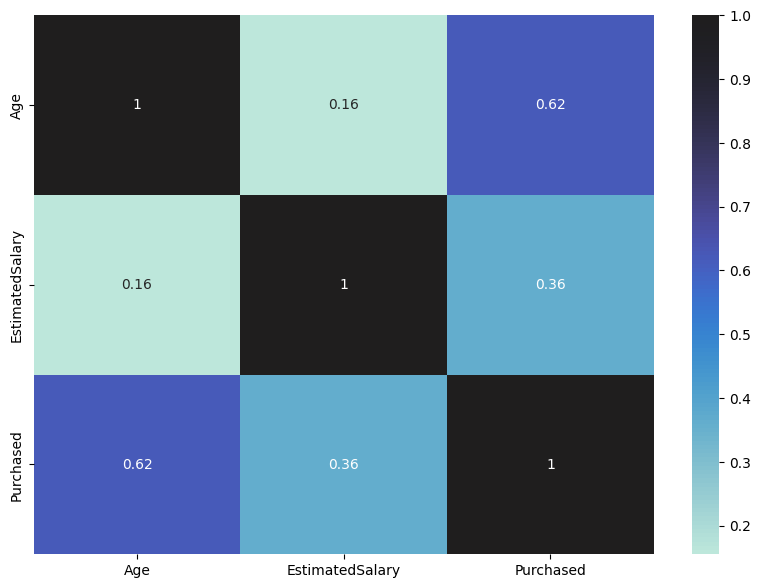

In [70]:
plt.figure(figsize=(10,7))
sns.heatmap(data=ads1.corr(),annot=True,center=True,cbar=True)
plt.plot()

In [52]:
X= ads.iloc[:,[2,3]].values
y = ads.iloc[:,4].values



IndexError: positional indexers are out-of-bounds

In [71]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

NameError: name 'x' is not defined

In [72]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

NameError: name 'X_train' is not defined

In [ ]:
# Fitting Logistic Regression to training dataset
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

In [ ]:
# Predict the test results
y_pred = classifier.predict(X_test)
y_pred

### **CONFUSION MATRIX**

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

print(f"Confusion Matrix: \n {confusion_matrix(y_test,y_pred)}")
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")

In [ ]:
# Plot the confusion matrix using heatmap
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,xticklabels=['Not Purchased','Purchased'],yticklabels=['Not Purchased','Purchased'])
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Classification Report for metrics of confusion matrix
print(f"Confusion Matrix Metrics: \n {classification_report(y_test,y_pred)}")